In [2]:
import tensorflow as tf

In [5]:
from tensorflow.examples.tutorials.mnist import input_data # 텐서플로 1.14 에서는 가능 1.15에서는 에러떴음
mnist = input_data.read_data_sets("../데이터/MNIST_data/",one_hot=True)

Extracting ../데이터/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../데이터/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../데이터/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../데이터/MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
X = tf.placeholder(tf.float32, shape=[None , 28*28]) # 28*28 
Y = tf.placeholder(tf.float32, shape = [None , 10]) # 0 ~ 9 까지의 수 

W = tf.Variable(tf.random_normal([28*28,10])) # 입력 * 출력 
b = tf.Variable(tf.random_normal([10]))

hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis = 1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.18)

train = optimizer.minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis,1),tf.arg_max(Y,1)) #모델 테스트  가설과 실제가 맞냐

accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32)) #정확도 

sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [7]:
#epoch 와 batch_size 
#epoch => 모든 데이터를 1번 다 돌림 1epoch 
#batch_size -> 모든 데이터가 클때 쪼개서 , batch_size * i = 1 epoch

training_epochs = 20   #모든데이터 15번 돌림 
batch_size = 100   # 100개씩 돌림 
for epoch in range(training_epochs+1):
    avg_cost =0 
    total_batch = int(mnist.train.num_examples / batch_size) # 몇번씩 돌려야 1epoch 인지 구함 
    for i in range(total_batch):
        batch_xs , batch_ys = mnist.train.next_batch(batch_size) # 다음 데이터를 batch개 불러옴
        c_val , _ = sess.run([cost,train],feed_dict={X:batch_xs,Y:batch_ys})
        avg_cost += c_val / total_batch  #실제 cost 보다 높게 잡힌다 
    if epoch %4 ==0:
        print(epoch, avg_cost)

    

0 2.0555560782822697
4 0.556896397769451
8 0.45654395806518466
12 0.4077436108887195
16 0.3781783622503283
20 0.35713574634356915


In [8]:
#평가 
print("Accuracy :", accuracy.eval(session=sess,feed_dict={X:mnist.test.images,Y:mnist.test.labels}))
# 테스트 셋으로 평가 

Accuracy : 0.9038


Labal : [0]
Predict : [0]


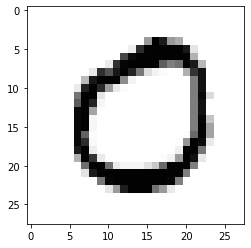

Labal : [2]
Predict : [1]


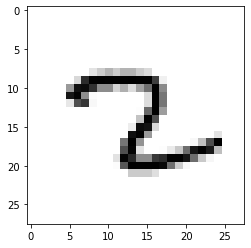

Labal : [6]
Predict : [6]


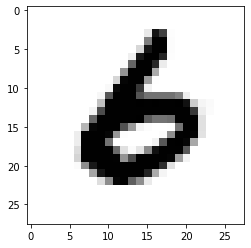

Labal : [4]
Predict : [4]


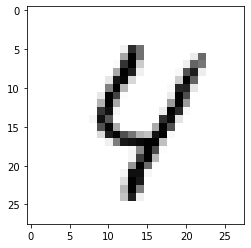

Labal : [3]
Predict : [8]


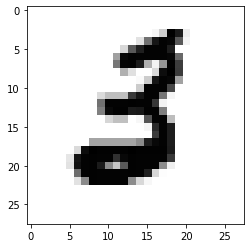

In [9]:
# 시각화 출력

import matplotlib.pyplot as plt
import random

for i in range(5):
    r=random.randint(0,mnist.test.num_examples -1) # 0부터 9까지

    print("Labal :",sess.run(tf.arg_max(mnist.test.labels[r:r+1],1)))
    print("Predict :",sess.run(tf.arg_max(hypothesis,1),feed_dict={X:mnist.test.images[r:r+1]}))

    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap="Greys",interpolation ='nearest')
    plt.show()